## 2.2. plot expression of genes in experimental timepoints

In this notebook we take some of the response genes that were found in script 2.1 and plot those either with UMAPs (one UMAP for each timepoint) or plot the expression using the average. Later in the workflow pseudotime will be calculated (scripts 3.1-3.8). This allows us to make much smoother, more detailed plots of the expression.

In [1]:
### loading python libraries

# standard libraries
import numpy as np
import pandas as pd

# single cell libraries
import anndata as ad
import scanpy as sc
sc.settings.verbosity = 0 

# plotting libraries
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['pdf.fonttype'] = 42 #for saving PDF with changeable text
plt.rcParams['ps.fonttype'] = 42 #for saving PDF with changeable text

# other 
import warnings
warnings.filterwarnings('ignore') #ignore filter warnings
import sklearn as sk #used for L2 normalization
import sklearn.preprocessing #used for L2 normalization
import math #to round up

# import own functions
from plotting import *

### Load data

Here, we load the filtered complete dataset (as produced in notebook 1.3).

In [2]:
### load Anndata object with the HSPC dataset (all four subsets incl.)
adata_path = "../data/count_matrices/all_filtered.h5ad"
adata = sc.read_h5ad(adata_path)

In [3]:
### L2 normalize dataset
adata.X = sk.preprocessing.normalize(adata.X, norm='l2')

In [4]:
### get timepoints and clusters
timepoints = adata.obs["time"].cat.categories.values
clusters = adata.obs['clusters'].cat.categories.values

### Plot gene expression in experimental time (UMAP)

Here, we visualize the expression of four response genes using a UMAP for each timepoint.

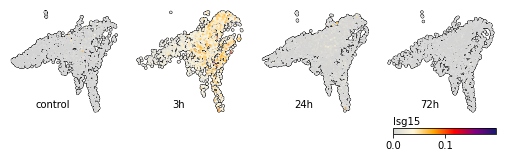

In [5]:
gene = "Isg15"

min_value = 0
max_value = (adata[:,gene].X.max())
plot_UMAP_per_timepoint(adata, gene, min_value=min_value, max_value=max_value,
                        var_label=gene, save=True, time_key="time", 
                        save_path=f"../figures/2.2.{gene}_expression_UMAP_per_timepoint.pdf")

In [6]:
selected_genes = ["Sec61g","Mnda","Cd74","Cox7c"]

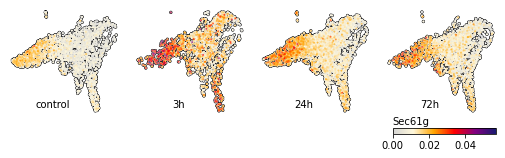

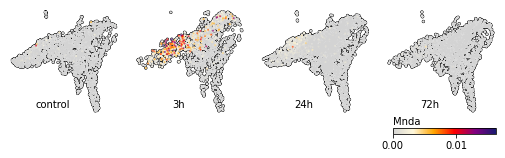

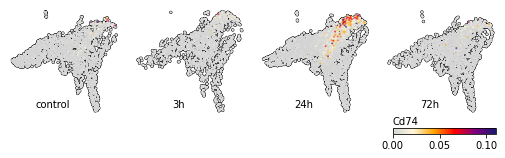

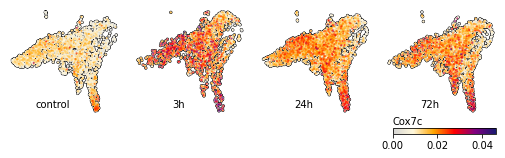

In [7]:
for gene in selected_genes:
    min_value = 0
    max_value = (adata[:,gene].X.max())
    plot_UMAP_per_timepoint(adata, gene, min_value=min_value, max_value=max_value, 
                        var_label=gene, save=True, time_key="time", 
                        save_path=f"../figures/2.2.{gene}_expression_UMAP_per_timepoint.pdf")

### Plot discrete expression in time

Here, we plot the expression of some example response genes in an alternative way. The mean expression for each of the clusters is plotted. 

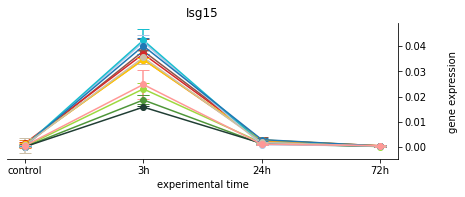

In [8]:
plot_discrete_expression(adata, "Isg15", split_key="clusters", time_key="time", save=False, save_path=None)

In [9]:
selected_genes = ["F13a1","Aldh1b1"]

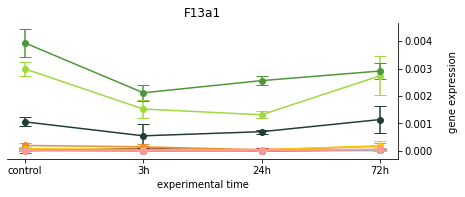

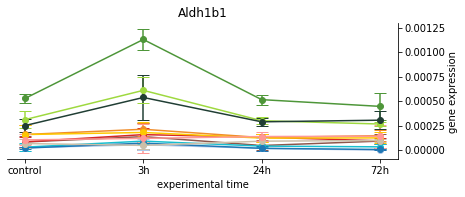

In [10]:
for gene in selected_genes:
    plot_discrete_expression(adata, gene, split_key="clusters", time_key="time", save=True, 
                             save_path=f"../figures/2.2.{gene}_discrete_expression.pdf")